In [4]:
# IMPORTS
import pandas as pd
import math
import os.path
import time
#from bitmex import bitmex
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)


In [2]:
symbol = 'BTCUSDT'
kline_size= '1h'

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}


In [7]:
data = pd.read_csv('./data/BTCUSDT-1h-data.csv').sort_values('timestamp')

In [4]:
data[~(pd.to_datetime(data.timestamp).diff() == timedelta(hours=1))]

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05,7887.635513
492,2017-09-06 23:00:00.000,4619.43,4662.87,4610.00,4619.77,16.743598,1504742399999,7.737911e+04,43,5.618378,2.598381e+04,11138.372786
3353,2018-01-04 05:00:00.000,15119.97,15119.97,14730.00,14875.10,888.843951,1515045599999,1.321703e+07,7247,467.652514,6.954219e+06,0.000000
4189,2018-02-09 09:28:14.789,7789.90,8390.00,7789.90,8180.50,1451.896450,1518172094788,1.200715e+07,10103,634.977699,5.240333e+06,0.000000
4232,2018-02-11 04:00:00.000,7976.74,8098.00,7910.01,7925.49,1055.865537,1518325199999,8.425749e+06,10906,512.684237,4.090583e+06,0.000000
7470,2018-06-26 12:00:00.000,6228.00,6228.00,6180.00,6209.99,1469.472361,1530017999999,9.123312e+06,9369,720.600044,4.473617e+06,0.000000
7495,2018-06-27 14:00:00.000,6087.84,6087.84,5971.00,6050.71,900.870997,1530111599999,5.425476e+06,4551,436.935367,2.631775e+06,0.000000
7650,2018-07-04 08:00:00.000,6481.72,6600.00,6455.20,6524.01,2074.806128,1530694799999,1.355044e+07,10216,965.058047,6.305128e+06,0.000000
10216,2018-10-19 09:00:00,6588.00,6615.54,6583.00,6600.90,794.121898,1539943199999,5.243315e+06,3679,515.766506,3.405493e+06,0.000000
10833,2018-11-14 09:00:00,6469.00,6482.84,6410.00,6432.10,989.436938,1542189599999,6.383754e+06,7576,286.563083,1.851145e+06,0.000000


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
from datetime import timedelta, datetime

In [1]:
from core.environment.environment import Environment
from core.traders.MA_Trader import MA_Trader


In [5]:
env = Environment(start_time=datetime.fromisoformat('2020-02-01 00:00:00'), 
                  time_delta='1h'
                 )


In [6]:
tr = UpperLower_trader(env, num_to_buy=5, num_to_sell=1)

NameError: name 'UpperLower_trader' is not defined

In [9]:
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'],
      dtype='object')

In [31]:
env = Environment(start_time=datetime.fromisoformat('2020-02-01 00:00:00'), 
                  time_delta='1h'
                 )

tr = MA_Trader(column_name='close', period_long=40, period_short=12, environment=env)
tr.evaluate()

result_pd = pd.DataFrame(tr.trade_record).T

len(result_pd)

108

In [109]:
tr = Point2Point_trader(env)

In [231]:
env = Environment(start_time=datetime.fromisoformat('2020-02-01 00:00:00'), 
                  time_delta='1h'
                 )
tr = Percentage_trader(environment=env, 
                       perc_to_buy=0.04, 
                       window_to_buy= 6,
                       perc_to_sell = -0.1,
                       window_to_sell= 12
                      )
tr.evaluate()

result_pd = pd.DataFrame(tr.trade_record).T

len(result_pd)

6

In [237]:
class tunner():
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        self.model.env.restart()
        model.evalueate()
        return self
    
    def predict(self, X):
        return model.trade_record
    
    def set_params(self, **kwargs):
        model.set_params(**kwargs)
        return self
    
    def get_params(self):
        return model.get_params()

In [32]:
result_pd.loc[:,'gan'] = result_pd.apply(lambda row: (row.end_price-row.start_price)*100/row.start_price, axis=1)
result_pd.dropna(inplace=True)
result_pd.gan.sum()

32.58103209707726

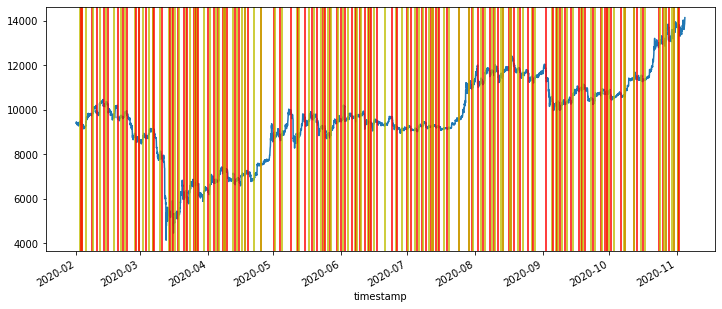

In [33]:
import matplotlib.pylab as pl

tr.env.get_data().close.plot(figsize=(12,5))
for init, end in zip(result_pd.start_datetime, result_pd.end_datetime):
    pl.axvline(init, color='y')
    pl.axvline(end, color='r')

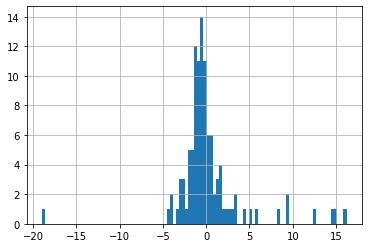

In [34]:
result_pd.gan.hist(bins=100)


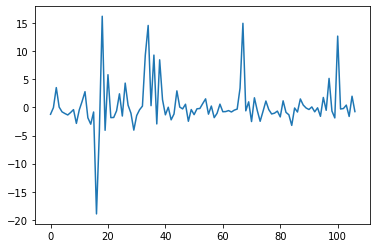

In [35]:
result_pd.gan.plot(); plt